In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

### load output for all models

In [2]:
# metrics
v1_3month = np.load('/scratch/users/ashdef/model_out/3month/training_history.npy', allow_pickle=True).item()
v2_3month = np.load('/scratch/users/ashdef/model_out/3month_dropout/training_history.npy', allow_pickle=True).item()
v3_3month = np.load('/scratch/users/ashdef/model_out/3month_no_batchnorm/training_history.npy', allow_pickle=True).item()
v1_6month = np.load('/scratch/users/ashdef/model_out/baseline/training_history.npy', allow_pickle=True).item()
v2_6month = np.load('/scratch/users/ashdef/model_out/6month_v2/training_history.npy', allow_pickle=True).item()
v3_6month = np.load('/scratch/users/ashdef/model_out/6month_v3/training_history.npy', allow_pickle=True).item()

In [3]:
# predictions
v13_predictions_original = np.load("/scratch/users/ashdef/model_out/3month/predictions_original.npy")
v23_predictions_original = np.load("/scratch/users/ashdef/model_out/3month_dropout/predictions_original.npy")
v33_predictions_original = np.load("/scratch/users/ashdef/model_out/3month_no_batchnorm/predictions_original.npy")

v16_predictions_original = np.load("/scratch/users/ashdef/model_out/baseline/predictions_original.npy")
v26_predictions_original = np.load("/scratch/users/ashdef/model_out/6month_v2/predictions_original.npy")
v36_predictions_original = np.load("/scratch/users/ashdef/model_out/6month_v3/predictions_original.npy")


# observations
v13_sfe_test_original = np.load("/scratch/users/ashdef/model_out/3month/sfe_test_original.npy")
v23_sfe_test_original = np.load("/scratch/users/ashdef/model_out/3month_dropout/sfe_test_original.npy")
v33_sfe_test_original = np.load("/scratch/users/ashdef/model_out/3month_no_batchnorm/sfe_test_original.npy")

v16_sfe_test_original = np.load("/scratch/users/ashdef/model_out/baseline/sfe_test_original.npy")
v26_sfe_test_original = np.load("/scratch/users/ashdef/model_out/6month_v2/sfe_test_original.npy")
v36_sfe_test_original = np.load("/scratch/users/ashdef/model_out/6month_v3/sfe_test_original.npy")


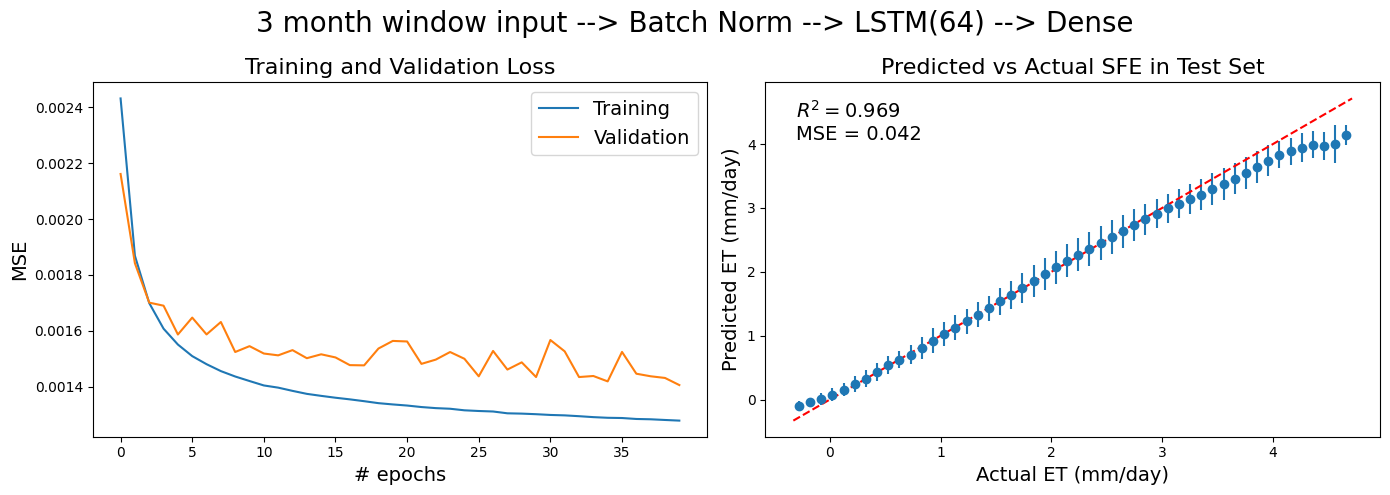

In [7]:
# asked chatgpt for skeleton code for two side by side subplots
# also for help with binning for right plot to reduce the number of scatter points shown
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# loss
ax = axes[0]

ax.plot(v1_3month['loss'], label='Training')
ax.plot(v1_3month['val_loss'], label='Validation')

ax.set_xlabel("# epochs", fontsize = 14)
ax.set_ylabel("MSE", fontsize = 14)
ax.set_xticks(range(0, 40, 5))

ax.set_title("Training and Validation Loss", fontsize = 16)
ax.legend(fontsize = 14)


# pred vs actual
ax = axes[1]

num_bins = 50

bins = np.linspace(v13_sfe_test_original.min(), v13_sfe_test_original.max(), num_bins + 1)
bin_indices = np.digitize(v13_sfe_test_original, bins)

means = []
stds = []

for i in range(1, len(bins)):
    mask = bin_indices == i
    means.append(np.mean(v13_predictions_original[mask]) if np.any(mask) else np.nan)
    stds.append(np.std(v13_predictions_original[mask]) if np.any(mask) else np.nan)

means = np.array(means)
stds = np.array(stds)

bin_centers = (bins[:-1] + bins[1:]) / 2

ax.errorbar(bin_centers, means, yerr=stds, fmt='o')
ax.plot([v13_sfe_test_original.min(), v13_sfe_test_original.max()],
        [v13_sfe_test_original.min(), v13_sfe_test_original.max()],
        'r--')

ax.set_xlabel('Actual ET (mm/day)', fontsize = 14)
ax.set_ylabel('Predicted ET (mm/day)', fontsize = 14)
ax.set_title('Predicted vs Actual SFE in Test Set', fontsize = 16)

r2 = r2_score(v13_sfe_test_original, v13_predictions_original)
mse = mean_squared_error(v13_sfe_test_original, v13_predictions_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(v13_sfe_test_original, v13_predictions_original)

ax.text(0.05, 0.95, f'$R^2 = {r2:.3f}$', transform=ax.transAxes, va='top', fontsize = 14)
ax.text(0.05, 0.88, f'MSE = {mse:.3f}', transform=ax.transAxes, va='top', fontsize = 14)
# ax.text(0.05, 0.80, f'RMSE = {rmse:.3f}', transform=ax.transAxes, va='top')
# ax.text(0.05, 0.72, f'MAE = {mae:.3f}', transform=ax.transAxes, va='top')

fig.suptitle("3 month window input --> Batch Norm --> LSTM(64) --> Dense", fontsize=20)

plt.tight_layout()
plt.show()
fig.savefig("/home/users/ashdef/twig_et_proj/model_dev/figs/3month_v1.png", dpi=300, bbox_inches="tight")


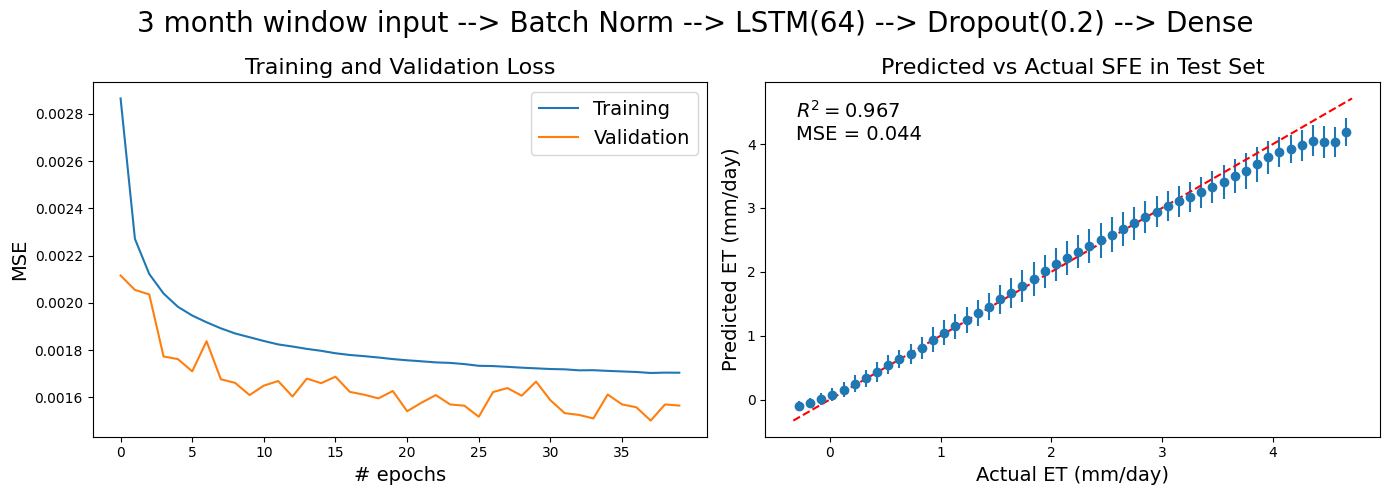

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# loss
ax = axes[0]

ax.plot(v2_3month['loss'], label='Training')
ax.plot(v2_3month['val_loss'], label='Validation')

ax.set_xlabel("# epochs", fontsize = 14)
ax.set_ylabel("MSE", fontsize = 14)
ax.set_xticks(range(0, 40, 5))

ax.set_title("Training and Validation Loss", fontsize = 16)
ax.legend(fontsize = 14)


# pred vs actual
ax = axes[1]

num_bins = 50

bins = np.linspace(v23_sfe_test_original.min(), v23_sfe_test_original.max(), num_bins + 1)
bin_indices = np.digitize(v23_sfe_test_original, bins)

means = []
stds = []

for i in range(1, len(bins)):
    mask = bin_indices == i
    means.append(np.mean(v23_predictions_original[mask]) if np.any(mask) else np.nan)
    stds.append(np.std(v23_predictions_original[mask]) if np.any(mask) else np.nan)

means = np.array(means)
stds = np.array(stds)

bin_centers = (bins[:-1] + bins[1:]) / 2

ax.errorbar(bin_centers, means, yerr=stds, fmt='o')
ax.plot([v23_sfe_test_original.min(), v23_sfe_test_original.max()],
        [v23_sfe_test_original.min(), v23_sfe_test_original.max()],
        'r--')

ax.set_xlabel('Actual ET (mm/day)', fontsize = 14)
ax.set_ylabel('Predicted ET (mm/day)', fontsize = 14)
ax.set_title('Predicted vs Actual SFE in Test Set', fontsize = 16)

r2 = r2_score(v23_sfe_test_original, v23_predictions_original)
mse = mean_squared_error(v23_sfe_test_original, v23_predictions_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(v23_sfe_test_original, v23_predictions_original)

ax.text(0.05, 0.95, f'$R^2 = {r2:.3f}$', transform=ax.transAxes, va='top', fontsize = 14)
ax.text(0.05, 0.88, f'MSE = {mse:.3f}', transform=ax.transAxes, va='top', fontsize = 14)
# ax.text(0.05, 0.80, f'RMSE = {rmse:.3f}', transform=ax.transAxes, va='top')
# ax.text(0.05, 0.72, f'MAE = {mae:.3f}', transform=ax.transAxes, va='top')

fig.suptitle("3 month window input --> Batch Norm --> LSTM(64) --> Dropout(0.2) --> Dense", fontsize=20)

plt.tight_layout()
plt.show()
fig.savefig("/home/users/ashdef/twig_et_proj/model_dev/figs/3month_v2.png", dpi=300, bbox_inches="tight")


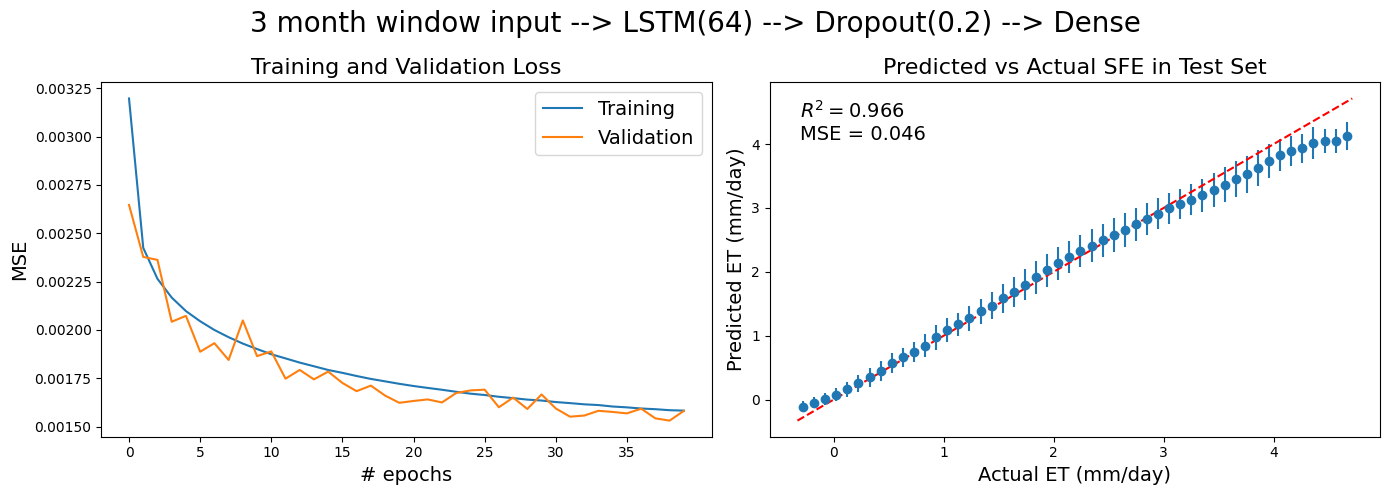

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# loss
ax = axes[0]

ax.plot(v3_3month['loss'], label='Training')
ax.plot(v3_3month['val_loss'], label='Validation')

ax.set_xlabel("# epochs", fontsize = 14)
ax.set_ylabel("MSE", fontsize = 14)
ax.set_xticks(range(0, 40, 5))

ax.set_title("Training and Validation Loss", fontsize = 16)
ax.legend(fontsize = 14)


# pred vs actual
ax = axes[1]

num_bins = 50

bins = np.linspace(v33_sfe_test_original.min(), v33_sfe_test_original.max(), num_bins + 1)
bin_indices = np.digitize(v33_sfe_test_original, bins)

means = []
stds = []

for i in range(1, len(bins)):
    mask = bin_indices == i
    means.append(np.mean(v33_predictions_original[mask]) if np.any(mask) else np.nan)
    stds.append(np.std(v33_predictions_original[mask]) if np.any(mask) else np.nan)

means = np.array(means)
stds = np.array(stds)

bin_centers = (bins[:-1] + bins[1:]) / 2

ax.errorbar(bin_centers, means, yerr=stds, fmt='o')
ax.plot([v33_sfe_test_original.min(), v33_sfe_test_original.max()],
        [v33_sfe_test_original.min(), v33_sfe_test_original.max()],
        'r--')

ax.set_xlabel('Actual ET (mm/day)', fontsize = 14)
ax.set_ylabel('Predicted ET (mm/day)', fontsize = 14)
ax.set_title('Predicted vs Actual SFE in Test Set', fontsize = 16)

r2 = r2_score(v33_sfe_test_original, v33_predictions_original)
mse = mean_squared_error(v33_sfe_test_original, v33_predictions_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(v33_sfe_test_original, v33_predictions_original)

ax.text(0.05, 0.95, f'$R^2 = {r2:.3f}$', transform=ax.transAxes, va='top', fontsize = 14)
ax.text(0.05, 0.88, f'MSE = {mse:.3f}', transform=ax.transAxes, va='top', fontsize = 14)
# ax.text(0.05, 0.80, f'RMSE = {rmse:.3f}', transform=ax.transAxes, va='top')
# ax.text(0.05, 0.72, f'MAE = {mae:.3f}', transform=ax.transAxes, va='top')

fig.suptitle("3 month window input --> LSTM(64) --> Dropout(0.2) --> Dense", fontsize=20)

plt.tight_layout()
plt.show()
fig.savefig("/home/users/ashdef/twig_et_proj/model_dev/figs/3month_v3.png", dpi=300, bbox_inches="tight")


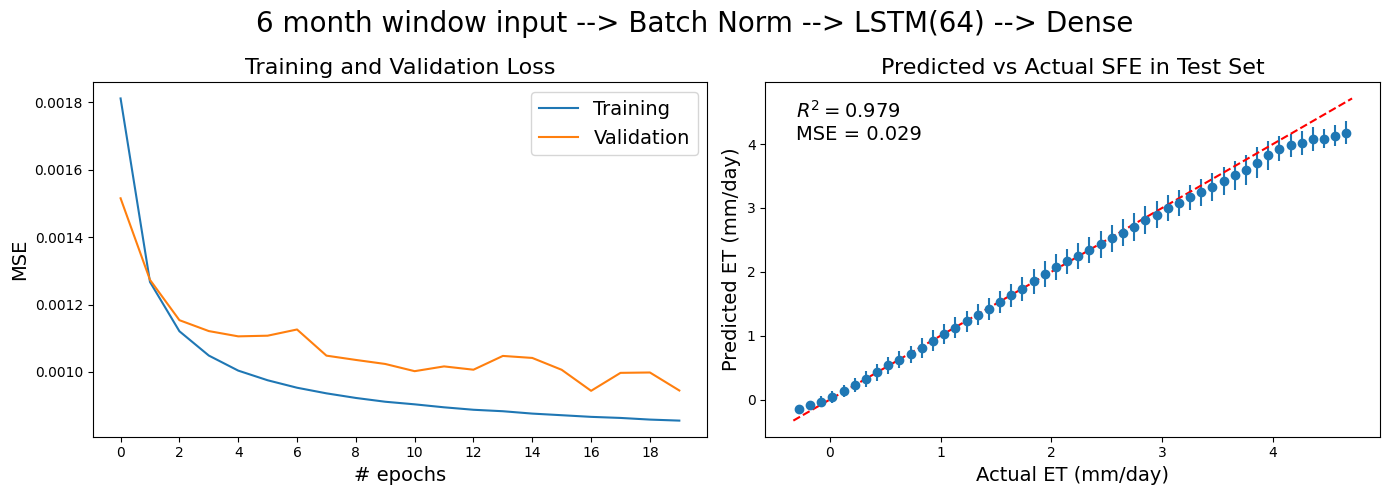

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# loss
ax = axes[0]

ax.plot(v1_6month['loss'], label='Training')
ax.plot(v1_6month['val_loss'], label='Validation')

ax.set_xlabel("# epochs", fontsize = 14)
ax.set_ylabel("MSE", fontsize = 14)
ax.set_xticks(range(0, 20, 2))

ax.set_title("Training and Validation Loss", fontsize = 16)
ax.legend(fontsize = 14)


# pred vs actual
ax = axes[1]

num_bins = 50

bins = np.linspace(v16_sfe_test_original.min(), v16_sfe_test_original.max(), num_bins + 1)
bin_indices = np.digitize(v16_sfe_test_original, bins)

means = []
stds = []

for i in range(1, len(bins)):
    mask = bin_indices == i
    means.append(np.mean(v16_predictions_original[mask]) if np.any(mask) else np.nan)
    stds.append(np.std(v16_predictions_original[mask]) if np.any(mask) else np.nan)

means = np.array(means)
stds = np.array(stds)

bin_centers = (bins[:-1] + bins[1:]) / 2

ax.errorbar(bin_centers, means, yerr=stds, fmt='o')
ax.plot([v16_sfe_test_original.min(), v16_sfe_test_original.max()],
        [v16_sfe_test_original.min(), v16_sfe_test_original.max()],
        'r--')

ax.set_xlabel('Actual ET (mm/day)', fontsize = 14)
ax.set_ylabel('Predicted ET (mm/day)', fontsize = 14)
ax.set_title('Predicted vs Actual SFE in Test Set', fontsize = 16)

r2 = r2_score(v16_sfe_test_original, v16_predictions_original)
mse = mean_squared_error(v16_sfe_test_original, v16_predictions_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(v16_sfe_test_original, v16_predictions_original)

ax.text(0.05, 0.95, f'$R^2 = {r2:.3f}$', transform=ax.transAxes, va='top', fontsize = 14)
ax.text(0.05, 0.88, f'MSE = {mse:.3f}', transform=ax.transAxes, va='top', fontsize = 14)
# ax.text(0.05, 0.80, f'RMSE = {rmse:.3f}', transform=ax.transAxes, va='top')
# ax.text(0.05, 0.72, f'MAE = {mae:.3f}', transform=ax.transAxes, va='top')

fig.suptitle("6 month window input --> Batch Norm --> LSTM(64) --> Dense", fontsize=20)

plt.tight_layout()
plt.show()
fig.savefig("/home/users/ashdef/twig_et_proj/model_dev/figs/6month_v1.png", dpi=300, bbox_inches="tight")


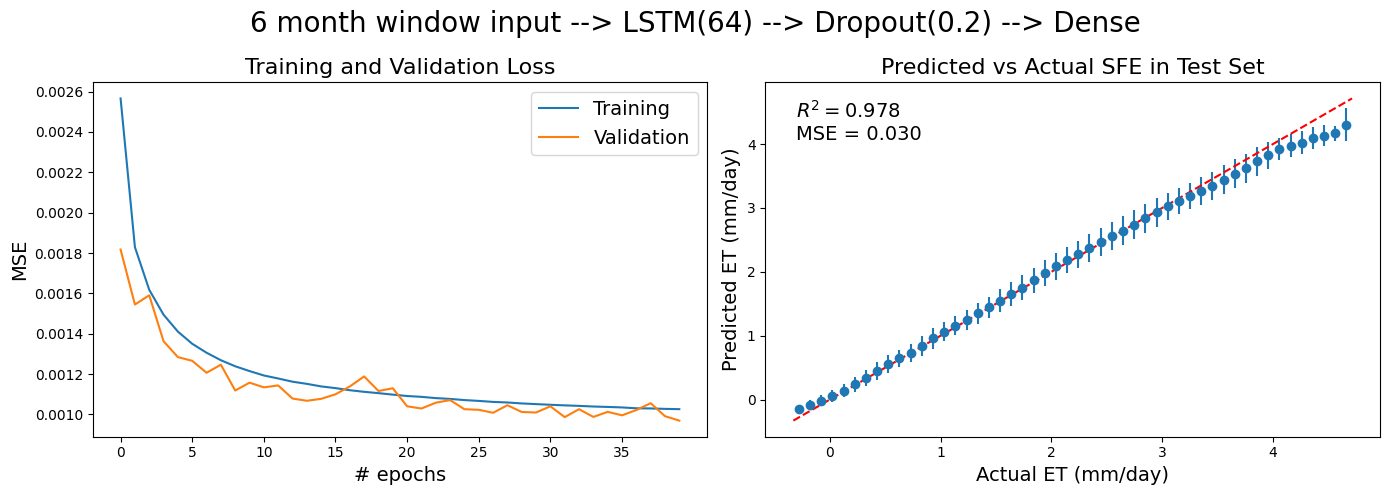

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# loss
ax = axes[0]

ax.plot(v2_6month['loss'], label='Training')
ax.plot(v2_6month['val_loss'], label='Validation')

ax.set_xlabel("# epochs", fontsize = 14)
ax.set_ylabel("MSE", fontsize = 14)
ax.set_xticks(range(0, 40, 5))
ax.set_title("Training and Validation Loss", fontsize = 16)
ax.legend(fontsize = 14)


# pred vs actual
ax = axes[1]

num_bins = 50

bins = np.linspace(v26_sfe_test_original.min(), v26_sfe_test_original.max(), num_bins + 1)
bin_indices = np.digitize(v26_sfe_test_original, bins)

means = []
stds = []

for i in range(1, len(bins)):
    mask = bin_indices == i
    means.append(np.mean(v26_predictions_original[mask]) if np.any(mask) else np.nan)
    stds.append(np.std(v26_predictions_original[mask]) if np.any(mask) else np.nan)

means = np.array(means)
stds = np.array(stds)

bin_centers = (bins[:-1] + bins[1:]) / 2

ax.errorbar(bin_centers, means, yerr=stds, fmt='o')
ax.plot([v26_sfe_test_original.min(), v26_sfe_test_original.max()],
        [v26_sfe_test_original.min(), v26_sfe_test_original.max()],
        'r--')

ax.set_xlabel('Actual ET (mm/day)', fontsize = 14)
ax.set_ylabel('Predicted ET (mm/day)', fontsize = 14)
ax.set_title('Predicted vs Actual SFE in Test Set', fontsize = 16)

r2 = r2_score(v26_sfe_test_original, v26_predictions_original)
mse = mean_squared_error(v26_sfe_test_original, v26_predictions_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(v26_sfe_test_original, v26_predictions_original)

ax.text(0.05, 0.95, f'$R^2 = {r2:.3f}$', transform=ax.transAxes, va='top', fontsize = 14)
ax.text(0.05, 0.88, f'MSE = {mse:.3f}', transform=ax.transAxes, va='top', fontsize = 14)
# ax.text(0.05, 0.80, f'RMSE = {rmse:.3f}', transform=ax.transAxes, va='top')
# ax.text(0.05, 0.72, f'MAE = {mae:.3f}', transform=ax.transAxes, va='top')

fig.suptitle("6 month window input --> LSTM(64) --> Dropout(0.2) --> Dense", fontsize=20)

plt.tight_layout()
plt.show()
fig.savefig("/home/users/ashdef/twig_et_proj/model_dev/figs/6month_v2.png", dpi=300, bbox_inches="tight")


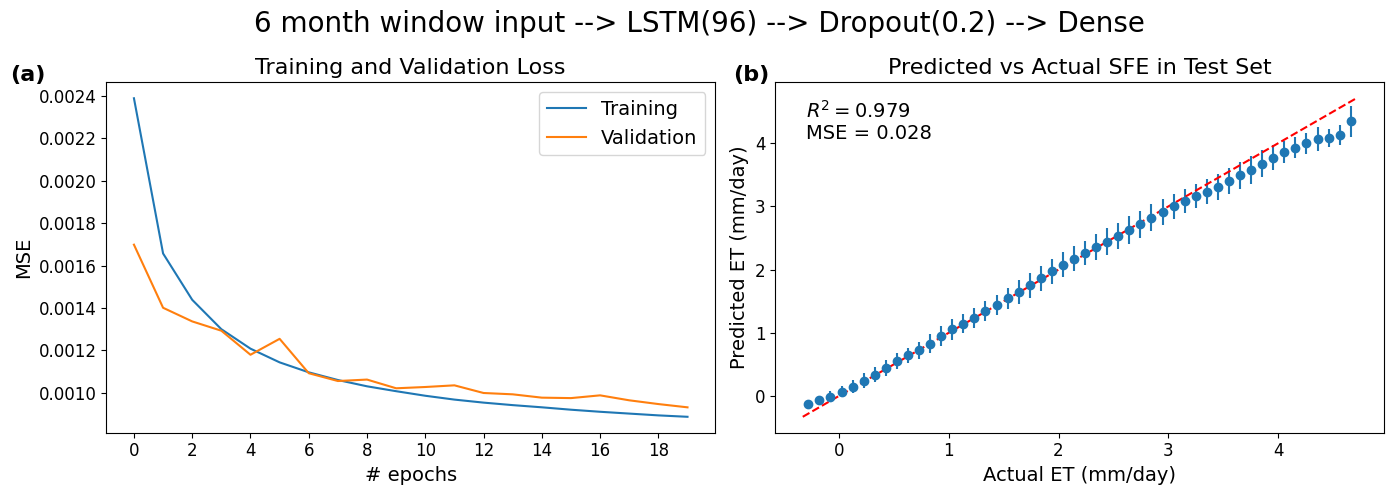

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# loss
ax = axes[0]

ax.plot(v3_6month['loss'], label='Training')
ax.plot(v3_6month['val_loss'], label='Validation')

ax.set_xlabel("# epochs", fontsize = 14)
ax.set_ylabel("MSE", fontsize = 14)
ax.set_xticks(range(0, 20, 2))
ax.tick_params(labelsize = 12)

ax.set_title("Training and Validation Loss", fontsize = 16)
ax.legend(fontsize = 14)

ax.text(-0.1, 1.05, "(a)", transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# pred vs actual
ax = axes[1]

num_bins = 50

bins = np.linspace(v36_sfe_test_original.min(), v36_sfe_test_original.max(), num_bins + 1)
bin_indices = np.digitize(v36_sfe_test_original, bins)

means = []
stds = []

for i in range(1, len(bins)):
    mask = bin_indices == i
    means.append(np.mean(v36_predictions_original[mask]) if np.any(mask) else np.nan)
    stds.append(np.std(v36_predictions_original[mask]) if np.any(mask) else np.nan)

means = np.array(means)
stds = np.array(stds)

bin_centers = (bins[:-1] + bins[1:]) / 2

ax.errorbar(bin_centers, means, yerr=stds, fmt='o')
ax.plot([v36_sfe_test_original.min(), v36_sfe_test_original.max()],
        [v36_sfe_test_original.min(), v36_sfe_test_original.max()],
        'r--')

ax.set_xlabel('Actual ET (mm/day)', fontsize = 14)
ax.set_ylabel('Predicted ET (mm/day)', fontsize = 14)
ax.set_title('Predicted vs Actual SFE in Test Set', fontsize = 16)
ax.tick_params(labelsize = 12)

r2 = r2_score(v36_sfe_test_original, v36_predictions_original)
mse = mean_squared_error(v36_sfe_test_original, v36_predictions_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(v36_sfe_test_original, v36_predictions_original)

ax.text(-0.01, 1.05, "(b)", transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

ax.text(0.05, 0.95, f'$R^2 = {r2:.3f}$', transform=ax.transAxes, va='top', fontsize = 14)
ax.text(0.05, 0.88, f'MSE = {mse:.3f}', transform=ax.transAxes, va='top', fontsize = 14)
# ax.text(0.05, 0.80, f'RMSE = {rmse:.3f}', transform=ax.transAxes, va='top')
# ax.text(0.05, 0.72, f'MAE = {mae:.3f}', transform=ax.transAxes, va='top')

fig.suptitle("6 month window input --> LSTM(96) --> Dropout(0.2) --> Dense", fontsize=20)

plt.tight_layout()
plt.show()
fig.savefig("/home/users/ashdef/twig_et_proj/model_dev/figs/6month_v3.png", dpi=300, bbox_inches="tight")


## pre treatment et distribution 

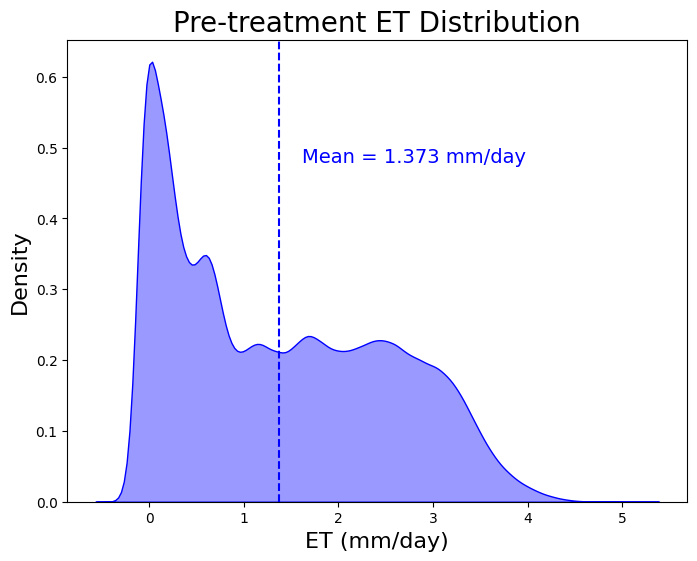

In [55]:
sfe_pre = np.load("/scratch/users/ashdef/pre_treatment_data/no_nans/sfe_filtered_window.npz", allow_pickle = True)["sfe_window"]
plt.figure(figsize=(8,6))
sns.kdeplot(sfe_pre, fill=True, alpha=0.4, color='blue')
plt.axvline(sfe_pre.mean(), color='blue', linestyle='--')
plt.text(2.8, 0.5,
         f"Mean = {sfe_pre.mean():.3f} mm/day",
         color='blue', ha='center', va='top', fontsize=14)
plt.xlabel("ET (mm/day)", fontsize = 16)
plt.ylabel('Density', fontsize = 16)
plt.title("Pre-treatment ET Distribution", fontsize = 20)
plt.show()